In [1]:
import numpy
import pygad

In [2]:
num_generations = 50 # Number of generations.
sol_per_pop = 8 # Number of solutions in the population.
num_parents_mating = 4 # Number of solutions to be selected as parents in the mating pool.

In [3]:
# Parameters of the mutation operation.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.
mutation_num_genes = None # Number of genes to mutate. If the parameter mutation_num_genes exists, then no need for the parameter mutation_percent_genes.

In [4]:
parent_selection_type = "tournament" # Type of parent selection.

crossover_type = "two_points" # Type of the crossover operator.

mutation_type = "scramble" # Type of the mutation operator.

keep_parents = 1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.


In [5]:
function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

num_genes = len(function_inputs)

def fitness_func(solution):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

In [6]:
# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations, 
          sol_per_pop=sol_per_pop, 
          num_parents_mating=num_parents_mating, 
          num_genes=num_genes,
          fitness_func=fitness_func,
          mutation_percent_genes=mutation_percent_genes,
          mutation_num_genes=mutation_num_genes,
          parent_selection_type=parent_selection_type,
          crossover_type=crossover_type,
          mutation_type=mutation_type,
          keep_parents=keep_parents,
          K_tournament=3)

In [7]:
# Running the GA to optimize the parameters of the function.
ga_instance.run()

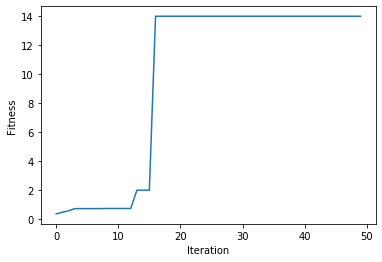

In [8]:
# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

In [9]:
# Returning the details of the best solution.
best_solution, best_solution_fitness = ga_instance.best_solution()
print("Parameters of the best solution :", best_solution)
print("Fitness value of the best solution :", best_solution_fitness, "\n")

Parameters of the best solution : [ 1.79092184  1.79092184  0.80024707  3.30161834 -2.69074053  1.79092184]
Fitness value of the best solution : 13.96389517889831 



In [10]:
# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

The saved instance of the genetic algorithm is loaded successfully.


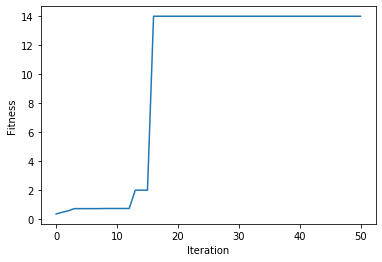

(array([ 1.79092184,  1.79092184,  0.80024707,  3.30161834, -2.69074053,
        1.79092184]), 13.96389517889831)


In [11]:
# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
print("The saved instance of the genetic algorithm is loaded successfully.")
loaded_ga_instance.plot_result()
print(loaded_ga_instance.best_solution())